# Homework 2 MLE and Naive Bayes

6232035721 Saenyakorn Siangsanoh

## MLE

Consider the following very simple model for stock pricing. The price at the end
of each day is the price of the previous day multiplied by a fixed, but unknown,
rate of return, $α$, with some noise, $w$. For a two-day period, we can observe the
following sequence

$y2 = αy1 + w1$

$y1 = αy0 + w0$

where the noises $w_0$, $w_1$ are iid with the distribution $N(0,σ^2), y_0 ∼N(0,λ)$
is independent of the noise sequence. $σ^2$ and $λ$ are known, while $α$ is unknown.

## T1

Find the MLE of the rate of return, α, given the observed price at
the end of each day $y_2$,$y_1$,$y_0$. In other words, compute for the value of α that
maximizes $p(y_2,y_1,y_0|α)$

**Hint**: This is a Markov process, e.g. $y_2$ is independent of $y_0$ given $y_1$.
In general, a process is Markov if $p(y_n|y_{n−1},y_{n−2},...) = p(y_n|y_{n−1})$. In other
words, the present is independent of the past $(y_{n−2},y_{n−3},...)$, conditioned on
the immediate past $y_{n−1}$. You may also find the steps of the proof for logistic
regression we did in class useful.

We know that $p(y_2,y_1,y_0|α) = p(y_2|y_1)p(y_1|y_0)p(y_0|\alpha)$

And 

$y_0 ∼N(0,λ)$

$y_1 ∼N(\alpha y_0, \sigma^2)$

$y_2 ∼N(\alpha y_1, \sigma^2)$

So,
\begin{aligned}
p(y_2,y_1,y_0|α) &= (\frac{1}{2\sqrt{2\pi}}e^{\frac{-1}{2}\frac{(y_2-\alpha y_1)^2}{\sigma^2}})(\frac{1}{2\sqrt{2\pi}}e^{\frac{-1}{2}\frac{(y_1-\alpha y_0)^2}{\sigma^2}})(\frac{1}{2\sqrt{2\pi}}e^{\frac{-1}{2}\frac{(y_0-0)^2}{\lambda}}) \\
&= (\frac{1}{2\sqrt{2\pi}})^3 exp(\frac{-1}{2}(\frac{(y_2-\alpha y_1)^2}{\sigma^2} + \frac{(y_1-\alpha y_0)^2}{\sigma^2} + \frac{y_0^2}{\lambda}))) \\
\end{aligned}
 
To find argmax, take $\frac{d}{d\alpha} log(p(y_2,y_1,y_0|α)) = 0$
\begin{aligned}
\frac{d}{d\alpha}(\frac{(y_2-\alpha y_1)^2}{\sigma^2} + \frac{(y_1-\alpha y_0)^2}{\sigma^2} + \frac{y_0^2}{\lambda}) &= 0 \\
\frac{2(-y_1)(y_2 - \alpha y_1)}{\sigma} + \frac{2(-y_0)(y_1 - \alpha y_0)}{\sigma} & = 0 \\ 
(y_2y_1 - \alpha y_1^2) + (y_1y_0 - \alpha y_0^2) & = 0 \\
\alpha(y_2^2+y_1^2) &= y_2y_1 + y_1y_0 \\ 
\alpha &= \frac{y_2y_1 + y_1y_0}{y_2^2+y_1^2}
\end{aligned}

## OT1

Consider the general case, where

$y_{n+1} = αy_n + w_n$,$n$ = 0,1,2,...

Find the MLE given the observed price $y_{N+1},y_N,...,y_0$

From **T1**, 

To find argmax of $p(y_{n+1},y_n,...,y_0|α)$, take $\frac{d}{d\alpha} log(p(y_{n+1},y_n,...,y_0|α)) = 0$

\begin{aligned}
\frac{d}{d\alpha}(\frac{(y_{n+1}-\alpha y_n)^2}{\sigma^2} + \frac{(y_n-\alpha y_{n-1})^2}{\sigma^2} + ... + \frac{y_0^2}{\lambda}) &= 0 \\

(y_{n+1}y_n - \alpha y_n^2) + (y_ny_{n-1} - \alpha y_{n-1}^2) + ... + (y_1y_0 - \alpha y_0^2) & = 0 \\

\frac{y_{n+1}y_n + y_ny_{n-1} + ... + y_1y_0}{y_{n+1}^2+y_n^2+...+y_1^2} &= \alpha \\
\end{aligned}

$\alpha = \frac{y_{n+1}y_n + y_ny_{n-1} + ... + y_1y_0}{y_{n+1}^2+y_n^2+...+y_1^2}$


## Simple Bayes Classifier

A student in Pattern Recognition course had finally built the ultimate classifier
for cat emotions. He used one input features: the amount of food the cat ate
that day, x (Being a good student he already normalized x to standard Normal).
He proposed the following likelihood probabilities for class 1 (happy cat) and 2
(sad cat)

$P(x|w1) = N(5,2)$

$P(x|w2) = N(0,2)$ 


## T2

Plot the posteriors values of the two classes on the same axis. Using the likelihood ratio test, what is the decision boundary for this classifier? Assume equal prior probabilities.

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import math
from sklearn.model_selection import train_test_split

intersect: x =  2.5


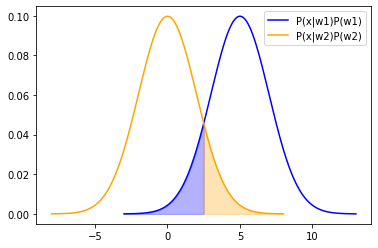

In [2]:
def plot_bayes_classifier(mu_1, mu_2, vars, p_w1, p_w2):
  # Assume same variance for both classes
  x_1 = np.linspace(mu_1 - 4*vars, mu_1 + 4*vars, 10000)
  y_1 = stats.norm.pdf(x_1, mu_1, vars) * p_w1
  x_2 = np.linspace(mu_2 - 4*vars, mu_2 + 4*vars, 10000)
  y_2 = stats.norm.pdf(x_2, mu_2, vars) * p_w2

  intersect_x = (2*vars**2*math.log(p_w2) - 2*vars**2*math.log(p_w1) + mu_1**2 - mu_2**2) / (2 * mu_1 - 2 * mu_2)
  print("intersect: x = ", intersect_x)

  # Plot the graph
  plt.plot(x_1, y_1, label='P(x|w1)P(w1)', color='blue')
  plt.fill_between(x_1[x_1 < intersect_x], y_1[x_1 < intersect_x], color='blue', alpha=0.3)
  plt.plot(x_2, y_2, label='P(x|w2)P(w2)', color='orange')
  plt.fill_between(x_2[x_2 > intersect_x], y_2[x_2 > intersect_x], color='orange', alpha=0.3)
  plt.legend()
  plt.show()

# Assume P(w1) = 0.5 and P(w2) = 0.5
vars = 2
mu_1 = 5
mu_2 = 0
p_w1 = 0.5
p_w2 = 0.5
plot_bayes_classifier(mu_1, mu_2, vars, p_w1, p_w2)

Since we assume priors are equal, that mean $P(w_1)$ = $P(w_2)$  

## T3

What happen to the decision boundary if the cat is happy with a prior of 0.8?

intersect: x =  1.3909645111040876


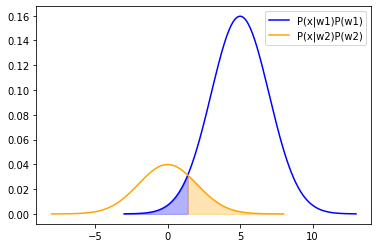

In [3]:
vars = 2
mu_1 = 5
mu_2 = 0
p_w1 = 0.8
p_w2 = 0.2
plot_bayes_classifier(mu_1, mu_2, vars, p_w1, p_w2)

## OT2

For the ordinary case of $P(x|w1)$ = $N(μ1,σ2)$, $P(x|w2)$ = $N(μ2,σ2)$,
$p(w1) = p(w2) = 0.5$, prove that the decision boundary is at $x = \frac{\mu_1+\mu_2}{2}$

If the student changed his model to

$P(x|w1) = N(5,2)$

$P(x|w2) = N(0,4)$

## Employee Attrition Prediction

In this part of the homework, we will work on employee attrition prediction
using data from Kaggle IBM HR Analytics Employee Attrition & Performance.

https://www.kaggle.com/pavansubhashtibm-hr-analytics-attrition-dataset/home

### The data

For each employee, 34 features are provided. We will use these features to predict each employee attrition e.g whether the employee will leave the company (**yes** for leaving, **no** for staying)

Notable features are:
- Education: 1 ’Below College’, 2 ’College’, 3 ’Bachelor’, 4 ’Master’, 5 ’Doctor’.
- Environment Satisfaction: 1 ’Low’, 2 ’Medium’, 3 ’High’, 4 ’Very High’.
- Job Involvement: 1 ’Low’, 2 ’Medium’, 3 ’High’, 4 ’Very High’.
- Job Satisfaction: 1 ’Low’, 2 ’Medium’, 3 ’High’, 4 ’Very High’.
- Performance Rating: 1 ’Low’, 2 ’Good’, 3 ’Excellent’, 4 ’Outstanding’.
- Relationship Satisfaction: 1 ’Low’, 2 ’Medium’, 3 ’High’, 4 ’Very High’.
- WorkLifeBalance: 1 ’Bad’, 2 ’Good’, 3 ’Better’, 4 ’Best’.

### The database

First let’s look at the given data file `hr-employee-attrition-with-null.csv`.
Load the data using pandas. Use `describe()` and `head()` to get a sense of what the data is like. Our target of prediction is Attrition. Other columns are our input features.

### Data cleaning
There are many missing values in this database. They are represented with NaN. In the previous homework, we filled the missing values with the mean, median, or mode values. That is because classifiers such as logistic regression cannot deal with missing feature values. However, for the case of Naive Bayes which we will use in this homework compares $\Pi_ip(x_i|class)$ and treat each $x_i$ as independent features. Thus, if a feature i is missing, we can drop that term
from the comparison without having to guess what the missing feature is. First, convert the yes and no in this data table to 1 and 0. Then, we have to convert each categorical feature to number.

```
all.loc[all["Attrition"] == "no", "Attrition"] = 0.0
all.loc[all["Attrition"] == "yes", "Attrition"] = 1.0
for col in cat_cols:
  all[col] = pd.Categorical(all[col]).codes
```

We will also drop the employee numbers.

```
all = all.drop(columns = "EmployeeNumber")
```

There is no standard rule on how much data you should segment into as training and test set. But for now let’s use 90% training 10% testing. Select 10% of the is `Attrition == yes` and 10% of the is `Attrition == no` as your testing set, test set. Then, use the rest of the data as your training set, `train set`.


### Histogram discretization

In class, we learned that in order to create a Bayes Classifier we first need to estimate the posterior or likelihood probability distributions. The simplest way to estimate probability distributions is via histograms. To do histogram estimation, we divide the entire data space into a finite number of bins. Then, we count how many data points are there in each bin and normalize using the total number of data points (so that the probability sums to 1). Since we are grouping a continuous valued feature into a finite number of bins, we can also
call this process, discretization. The following code create a histogram of a column col from `train set`

```
# remove NaN values
train_col_no_nan = train_set[~np.isnan(train_set[col])]
# bin the data into 40 equally spaced bins
# hist is the count for each bin
# bin_edge is the edge values of the bins
hist, bin_edge = np.histogram(train_col_no_nan, 40)
# make sure to import matplotlib.pyplot as plt
# plot the histogram
plt.fill_between(bin_edge.repeat(2)[1:-1],hist.repeat(2),facecolor=’steelblue’)
plt.show()
```

In [143]:
# Gather training data
data_url = "https://raw.githubusercontent.com/ekapolc/pattern_2022/main/HW/HW02/hr-employee-attrition-with-null.csv"
all_data = pd.read_csv(data_url)

In [144]:
# Convert to codes
all_data.loc[all_data["Attrition"] == "Yes", "Attrition"] = 1.0
all_data.loc[all_data["Attrition"] == "No", "Attrition"] = 0.0
for col in ["Education", "EnvironmentSatisfaction", "JobInvolvement", "JobSatisfaction", "PerformanceRating", "RelationshipSatisfaction", "WorkLifeBalance"]:
  all_data[col] = pd.Categorical(all_data[col]).codes

In [145]:
# Drop unnecessary columns
all_data = all_data.drop(columns = ["EmployeeNumber"])

In [146]:
# Separate data into training and testing
X_train, X_test, y_train, y_test = train_test_split(all_data, all_data["Attrition"], test_size=0.1, random_state=42, stratify=all_data["Attrition"])
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (1323, 35)
X_test:  (147, 35)
y_train:  (1323,)
y_test:  (147,)


## T4

Observe the histogram for `Age`, `MonthlyIncome` and `DistanceFromHome`.
How many bins have zero counts? Do you think this is a good discretization?
Why?

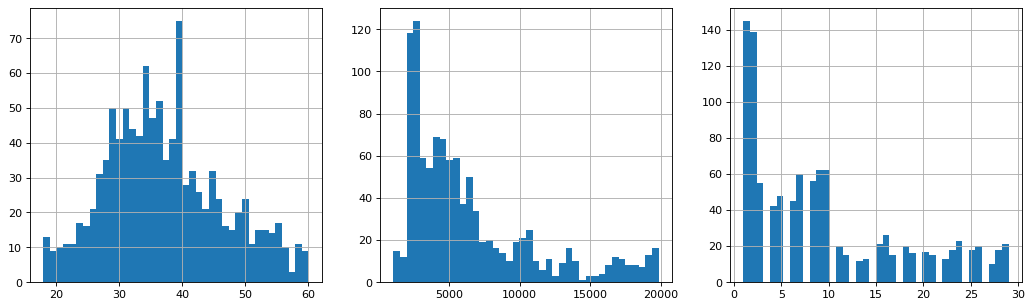

In [147]:
bins = 40
cols = ["Age", "MonthlyIncome", "DistanceFromHome"]
plt.figure(figsize=(16, 10), dpi=80)
for i in range(len(cols)):
  col = cols[i]
  ax = plt.subplot(2, 3, i+1)
  X_train[col].hist(bins=bins)

## Answer

มีเพียง "DistanceFromHome" ที่มี bin ที่ไม่มีค่าอยู่ในนั้น ซึ่งคือ discretization ไม่ดี เพราะอาจจะทำให้การทำนายตอนทำ model ผิดพลาดได้

## T5

Can we use a Gaussian to estimate this histogram? Why? What about a
Gaussian Mixture Model (GMM)?
The above discretization equally segments the space into equally spaced bins. This is the best method to segment if you know nothing about the data. Still, doing so may leave us with many bins with zero counts when we have too little data. To prevent this issue, we might assume that the distribution of our data is Normal then draw the probabilities of each data point from this distribution instead. We will do this later. For now, do

1. First set the number of bins to 10 for `Age`, `MonthlyIncome` and
`DistanceFromHome`. **Make numbers of bin a parameter as we will change
this later**.

2. Bin each values in the training set into bins using the function `np.digitize`, then count the number in each bins using `np.bincount`. Be careful with the maximum and minimum values, your first bin should cover `−inf`, and your final bin should cover `inf`, so that you can handle test data that might be outside of the minimum and maximum values.

## Answer

สำหรับ Age ใช้ Gaussian ได้ แต่สำหรับ MonthlyIncome กับ DistanceFromHome น่าจะไม่ได้ (น่าจะเป็น beta distribution) และไม่น่าใช้ GMM ได้ เพราะยังไม่ค่อยชัดเจนว่ามีมากกว่า 1 Gaussian ใน histogram

In [182]:
# Bin each values into bins
def bin_data(data: pd.Series, bins=10):
  bin_edge = np.block([-np.inf, np.arange(data.min(), data.max(), bins),  np.inf])
  inds = np.digitize(data, bin_edge)
  return np.bincount(inds)

## T6

Now plot the histogram according to the method described above (with
10, 40, and 100 bins) and show 3 plots for Age, MonthlyIncome, and DistanceFromHome. Which bin size is most sensible for each features? Why?

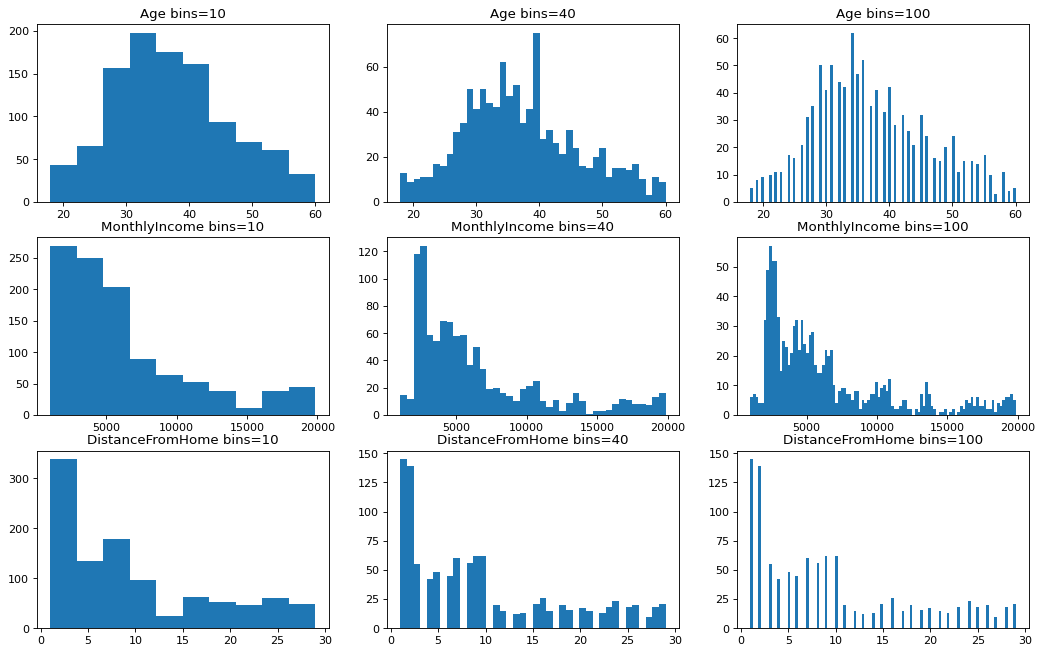

In [201]:
bins = [10, 40, 100]
cols = ["Age", "MonthlyIncome", "DistanceFromHome"]
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(16, 10), dpi=80)
for i in range(len(bins)):
  for j in range(len(cols)):
    axs[j][i].set_title(f"{cols[j]} bins={bins[i]}")
    axs[j][i].hist(X_train[cols[j]], bins=bins[i])

## Answer

สำหรับ Age, bins ที่เหมาะสมจะเป็น 40 เพราะสามารถบอกการกระจายข้อมูลได้ละเอียดพอดี ไม่หยาบและไม่ละเอียดจนเกินไป

สำหรับ MonthlyIncome, bins ที่เหมาะสมจะอยู่ที่ 100 เพราะข้อมูลมีการกระจายตัวมาก 

สำหรับ DistanceFromHome, bins ที่เหมาะสมคือ 10 เพราะข้อมูล DistanceFromHome จะอยู่แค่ในช่วงแคบ ๆ ไม่จำเป็นต้องใช้ bins จำนวนเยอะ ๆ

## T7

For the rest of the features, which one should be discretized? What are the criteria for choosing whether we should discretize a feature or not? Answer this and discretize those features into 10 bins each. In other words, figure out the bin edge for each feature, then use `digitize()` to convert the features to discrete values.

**The MLE for the likelihood distribution of discretized histograms**

We would like to build a Naive Bayes classifier which compares the posterior $p(leave|x_i)$ against $p(stay|x_i)$. However, figuring out $p(class|x_i)$ is often hard (not true for this case). Thus, we turn to the likelihood $p(x_i|class)$, which can be derived from the discretized histograms.

## Answer

ทุก Columns ที่เป็นจำนวนและมี variance ของข้อมูลประมาณหนึ่ง เช่น "DailyRate", "HourlyRate", "MonthlyIncome" เป็นต้น แต่ข้อมูลที่เป็นประเภทที่มีการกระจายตัวต่ำ ๆ (min-max อยู่ที่ 1-4 หรืออะไรประมาณนั้น) อาจไม่จำเป็น เช่น "Education", "PerformanceRating", "StockOptionLevel"

## T8

What kind of distribution should we use to model histograms? (Answer a distribution name) What is the MLE for the likelihood distribution? (Describe how to do the MLE). Plot the likelihood distributions of MonthlyIncome, JobRole, HourlyRate, and MaritalStatus for different Attrition values.

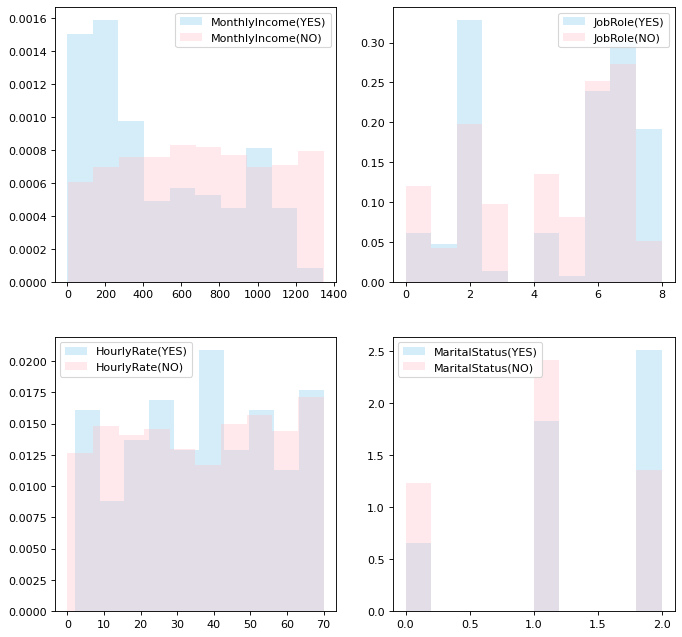

In [19]:
features = ["MonthlyIncome", "JobRole", "HourlyRate", "MaritalStatus"]
plt.figure(figsize=(10, 10), dpi=80)
for i in range(len(features)):
  ax = plt.subplot(2, 2, i+1)
  data_yes = train_data.loc[train_data["Attrition"] == 1, features[i]]
  data_no = train_data.loc[train_data["Attrition"] == 0, features[i]]
  ax.hist(data_yes, bins=10, label=features[i] + "(YES)", density=True, alpha=0.35, color="skyblue")
  ax.hist(data_no, bins=10, label=features[i] + "(NO)", density=True, alpha=0.35, color="pink")
  ax.legend()
plt.show()

## Answer 

ใช้ Gaussian Distribution ในการ model histograms โดย MLE Gaussian คือ



## T9 

What is the prior distribution of the two classes?

**Naive Bayes classification**

We are now ready to build our Naive Bayes classifier. Which makes a decision according to

\begin{aligned}
H(x) = \frac{p(leave)}{p(stay)}\Pi_{i=1}\frac{p(x_i|leave)}{p(x_i|stay)}
\end{aligned}

If $H(x)$ is larger than 1, then classify it as leave. If $H(x)$ is smaller than 1, then classify it as `stay`.

Note we often work in the log scale to prevent floating point underflow. In other words,

\begin{aligned}
lH(x) = logp(leave) −logp(stay)+ \Sigma_{i=1}[logp(xi|leave) −logpp(xi|stay)]
\end{aligned}

If `lH(x)` is larger than 0, then classify it as leave. If `lH(x)` is smaller than 0, then classify it as stay.

In [145]:
# Find prior distribution
def get_prior(train_data, _class=0):
  return train_data.loc[train_data["Attrition"] == _class, "Attrition"].count() / train_data.shape[0]

print("Prior distribution (Yes):", get_prior(train_data, 1))
print("Prior distribution (No):", get_prior(train_data, 0))

Prior distribution (Yes): 0.1649659863945578
Prior distribution (No): 0.8350340136054422


## T10

If we use the current Naive Bayes with our current Maximum Likelihood Estimates, we will find that some $P(x_i|attrition)$ will be zero and will result in the entire product term to be zero. Propose a method to fix this problem.

## Answer 

ใช้วิธี flooring คือแทนที่จะให้ $P(x_i|attrition) = 0$ ให้เป็นค่าน้อยมาก ๆ แทน เช่น $P(x_i|attrition) = 10^{-20}$ เพื่อความง่ายในการ implement เราจะบวก $10^{-20}$ ให้ทุก $P(x_i|attrition)$



## T11

Implement your Naive Bayes classifier. Use the learned distributions to classify the test set. Don’t forget to allow your classifier to handle missing values in the test set. Report the overall Accuracy. Then, report the Precision, Recall, and F score for detecting attrition. See Lecture 1 for the definitions of each metric

#### Probability density function

Now, instead of using histogram discretization, we will assume that our features are normally distributed. In other words, for certain feature types, $P(x_i|attrition)$ is now Normally distributed. By doing so, we can estimate the mean and standard deviation for each feature and compute the probability of each test feature by using the Gaussian probability density function instead. You can do this by calling:

`scipy.stats.norm(mean, std).pdf(feature_value)`

In [144]:
# Define Bayes classifier
class GaussianNaiveBayes:
  def __init__(self, df):
    self.prior_yes = get_prior(df, 1)
    self.prior_no = get_prior(df, 0)
    self.train_data = df
    self._train()

  def _train(self):
    # Calculate MLE for each feature
    self.table = {}
    # We assume that the features distribution is Gaussian
    for feature in self.train_data.columns:
      self.table[feature] = {}
      self.table[feature]["mean"] = self.train_data.loc[self.train_data["Attrition"] == 1, feature].mean()
      self.table[feature]["std"] = self.train_data.loc[self.train_data["Attrition"] == 1, feature].std()
      self.table[feature]["count"] = self.train_data.loc[self.train_data["Attrition"] == 1, feature].count()
      self.table[feature]["count_no"] = self.train_data.loc[self.train_data["Attrition"] == 0, feature].count()
  
  def predict(self, test_df):
    pass

features = ["Age", "MonthlyIncome", "DistanceFromHome", "JobRole", "HourlyRate"] + ["Attrition"]

0.1649659863945578 0.37130775059322507


## T12

Use the learned distributions to classify the test set. Report the results using the same metric as the previous question.

**Baseline comparison**

In machine learning, we need to be able to evaluate how good our model is. We usually compare our model with a different model and show that our model is better. Sometimes we do not have a candidate model to evaluate our method against. In this homework, we will look at two simple baselines, the random choice, and the majority rule.

## T13

The random choice baseline is the accuracy if you make a random guess for each test sample. Give random guess (50% leaving, and 50% staying) to the test samples. Report the overall Accuracy. Then, report the Precision, Recall, and F score for attrition prediction using the random choice baseline.

## T14

The majority rule is the accuracy if you use the most frequent class from the training set as the classification decision. Report the overall Accuracy. Then, report the Precision, Recall, and F score for attrition prediction using the majority rule baseline.

## T15

Compare the two baselines with your Naive Bayes classifier.

**Threshold finding**

In practice, instead of comparing `lH(x)` against 0, we usually compare against a threshold, t. We can change the threshold so that we maximize the accuracy,
precision, recall, or F score (depending on which measure we want to optimize).

## T16

Use the following threshold values

`t = np.arange(-5,5,0.05)`

find the best accuracy, and F score (and the corresponding thresholds)

**Receiver Operating Characteristic (RoC) curve**

The recall rate (true positive rate) and the false alarm rate can change as we vary the threshold. The false alarm rate will deteriorate as we decrease the
threshold (more false alarms). On the other hand, the recall rate will improve. This is also another trade-off machine learning practitioners need to consider. If we plot the false alarm vs recall as we vary the threshold (false alarm as the x-axis and recall as the y-axis), we get a plot called the ”Receiver operating characteristic (RoC) curve.” The RoC curve illustrates the performance of a
binary classifier (Will this person leave? Will this person survive the Titanic?
yes or no) as the threshold is varied. An example RoC curve is shown below

## T17

Plot the RoC of your classifier.

## T18

Change the number of discretization bins to 5. What happens to the RoC curve? Which discretization is better? The number of discretization bins can be considered as a hyperparameter, and must be chosen by comparing the final performance.

## T19

Submit your code (.py or .ipynb) on mycourseville.
If you’ve made it this far, congratulations! you’ve just created simple models that can help HR deal with one of their biggest problems. Simple, isn’t it?
This is a real world task with real implications, and I personally have been approached by big companies to help with this.

**(Optional) Classifier Variance**

Recall, in class, we talked about the variance of a classifier as the training set changes. In this section, we will evaluate our model if we shuffle the training and test data. This will give a measure whether our recognizer is good just because we are lucky (and give statistical significance to our experiments).

## OT3

Shuffle the database, and create new test and train sets. Redo the entire training and evaluation process 10 times (each time with a new training and test set). Calculate the mean and variance of the accuracy rate.